<a href="https://colab.research.google.com/github/Esmail97/ML-projects/blob/main/loan_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score ,accuracy_score
from sklearn.svm import SVC

In [2]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
le = LabelEncoder()
for col in train.select_dtypes(include=['object']):
    train[col] = le.fit_transform(train[col])

In [4]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [5]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
train.dropna(inplace=True)

<Axes: >

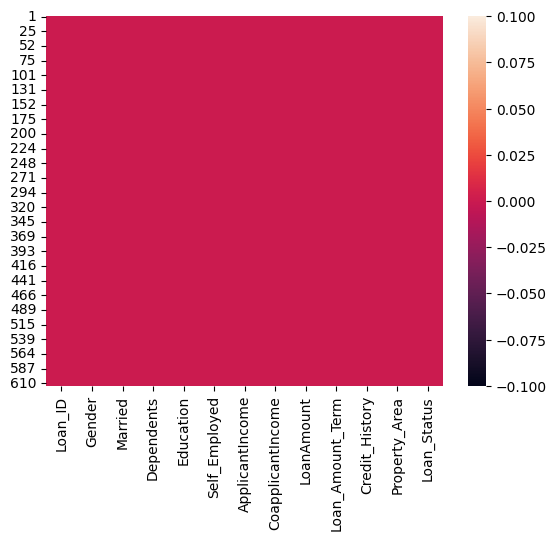

In [8]:
sns.heatmap(train.isnull())

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            529 non-null    int64  
 1   Gender             529 non-null    int64  
 2   Married            529 non-null    int64  
 3   Dependents         529 non-null    int64  
 4   Education          529 non-null    int64  
 5   Self_Employed      529 non-null    int64  
 6   ApplicantIncome    529 non-null    int64  
 7   CoapplicantIncome  529 non-null    float64
 8   LoanAmount         529 non-null    float64
 9   Loan_Amount_Term   529 non-null    float64
 10  Credit_History     529 non-null    float64
 11  Property_Area      529 non-null    int64  
 12  Loan_Status        529 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 57.9 KB


In [9]:
train.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
mean,309.540643,0.843100,0.648393,0.854442,0.204159,0.226843,5507.822306,1542.394934,145.852552,342.351607,0.850662,1.018904,0.691871
std,177.049788,0.421885,0.485785,1.121241,0.403467,0.520014,6404.132369,2524.295797,84.108409,64.861662,0.356759,0.778269,0.462157
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,159.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2900.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3816.000000,1086.000000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,463.000000,1.000000,1.000000,2.000000,0.000000,0.000000,5815.000000,2232.000000,167.000000,360.000000,1.000000,2.000000,1.000000
max,613.000000,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,33837.000000,700.000000,480.000000,1.000000,2.000000,1.000000


##Build Machine Learining model

In [10]:
#split data
X = train.drop(['Loan_Status'],axis=1)
y = train.Loan_Status

In [11]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 529, dtype: int64

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
model=SVC(kernel='linear')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_pred,y_test))

Accuracy Score:  0.7830188679245284
